In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
jasper.streams()

[http://streamhub:9292/streamhub/streams/colorstream,
 http://jasper:8181/jasper/streams/yellow]

# If you did not create the yellow color stream before go back to Ex4

In [4]:
qid  = 'reasoning2'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
frmt = 'JSON'
body = '''
    
    SELECT (COUNT(?p) AS ?cntPrimary) (COUNT(?d) AS ?cntDerived) ((?cntPrimary>?cntDerived) as ?morePrimaryThanDerived)  
    FROM NAMED WINDOW <cw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT15S STEP PT5S]
    FROM NAMED WINDOW <yw> ON <http://jasper:8181/jasper/streams/yellow> [RANGE PT15S STEP PT5S]
    WHERE {
        { WINDOW ?pw { ?p a <http://www.streamreasoning.org/ontologies/2018/9/colors#Primary> . }}
        UNION
        { WINDOW ?dw { ?d a <http://www.streamreasoning.org/ontologies/2018/9/colors#Derived>. }}
    }

    '''

In [5]:
reasoning2q = jasper.create(qid, body, tbox, frmt)

In [6]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [7]:
endpoint = reasoning2q.stream().endpoints()[0]

In [8]:
resp = endpoint.call()

In [9]:
resp.flatten()

[
    {
        "head_vars_0": "cntPrimary",
        "head_vars_1": "cntDerived",
        "head_vars_2": "morePrimaryThanDerived",
        "results_bindings_0_cntPrimary_type": "literal",
        "results_bindings_0_cntPrimary_datatype": "http://www.w3.org/2001/XMLSchema#integer",
        "results_bindings_0_cntPrimary_value": "76",
        "results_bindings_0_cntDerived_type": "literal",
        "results_bindings_0_cntDerived_datatype": "http://www.w3.org/2001/XMLSchema#integer",
        "results_bindings_0_cntDerived_value": "55",
        "results_bindings_0_morePrimaryThanDerived_type": "literal",
        "results_bindings_0_morePrimaryThanDerived_datatype": "http://www.w3.org/2001/XMLSchema#boolean",
        "results_bindings_0_morePrimaryThanDerived_value": "true"
    },
    {
        "head_vars_0": "cntPrimary",
        "head_vars_1": "cntDerived",
        "head_vars_2": "morePrimaryThanDerived",
        "results_bindings_0_cntPrimary_type": "literal",
        "results_bindings_0

In [10]:
df = resp.flatten().dataframe(['results_bindings_0_cntPrimary_value', 'results_bindings_0_cntDerived_value'])
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntDerived_datatype,results_bindings_0_cntDerived_type,results_bindings_0_cntDerived_value,results_bindings_0_cntPrimary_datatype,results_bindings_0_cntPrimary_type,results_bindings_0_cntPrimary_value,results_bindings_0_morePrimaryThanDerived_datatype,results_bindings_0_morePrimaryThanDerived_type,results_bindings_0_morePrimaryThanDerived_value
0,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,55,http://www.w3.org/2001/XMLSchema#integer,literal,76,http://www.w3.org/2001/XMLSchema#boolean,literal,true
1,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,55,http://www.w3.org/2001/XMLSchema#integer,literal,134,http://www.w3.org/2001/XMLSchema#boolean,literal,true
2,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,100,http://www.w3.org/2001/XMLSchema#integer,literal,134,http://www.w3.org/2001/XMLSchema#boolean,literal,true
3,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,100,http://www.w3.org/2001/XMLSchema#integer,literal,198,http://www.w3.org/2001/XMLSchema#boolean,literal,true
4,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,128,http://www.w3.org/2001/XMLSchema#integer,literal,198,http://www.w3.org/2001/XMLSchema#boolean,literal,true


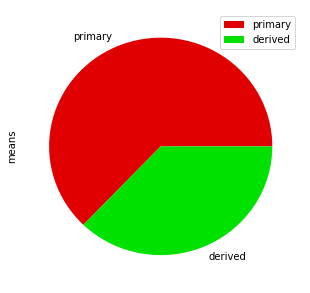

In [11]:
%matplotlib inline
import pandas as pd

df1 = df[['results_bindings_0_cntPrimary_value','results_bindings_0_cntDerived_value']]
cntg_mean = df1['results_bindings_0_cntPrimary_value'].mean()
cntr_mean = df1['results_bindings_0_cntDerived_value'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['primary', 'derived'])
plot = df.plot.pie(y='means', colors=["#e10000", "#00e100"], figsize=(5, 5))

In [12]:
jasper.delete(qid)

{
    "@id": "queries/reasoning2",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/reasoning2"
    },
    "prov:uses": {
        "@id": "streams/yellow"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}